In [1]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
import pandas as pd

# Tải dữ liệu từ file CSV
df = pd.read_csv('data/dulieuxettuyendaihoc.csv')

# Hiển thị các dòng dữ liệu
df.head()


,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [3]:
# Hiển thị thông tin cơ bản về dữ liệu
# Exploratory Data Analysis
print("Thông tin cơ bản về dữ liệu:")
(df.info())

Thông tin cơ bản về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   T1                   100 non-null    float64
 2   T2                   100 non-null    float64
 3   T3                   100 non-null    float64
 4   T4                   100 non-null    float64
 5   T5                   100 non-null    float64
 6   T6                   100 non-null    float64
 7   GT                   100 non-null    object 
 8   DT                   3 non-null      float64
 9   KV                   100 non-null    object 
 10  NGONNGU              100 non-null    float64
 11  TOANLOGICPHANTICH    100 non-null    float64
 12  GIAIQUYETVANDE       100 non-null    float64
 13  KT                   100 non-null    object 
 14  NGAYTHI              100 non-null    object 
 15  DINHHUONGNGH

In [4]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị thiếu trong mỗi cột:
MSSV                    0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
GT                      0
DT                     97
KV                      0
NGONNGU                 0
TOANLOGICPHANTICH       0
GIAIQUYETVANDE          0
KT                      0
NGAYTHI                 0
DINHHUONGNGHENGHIEP     0
dtype: int64


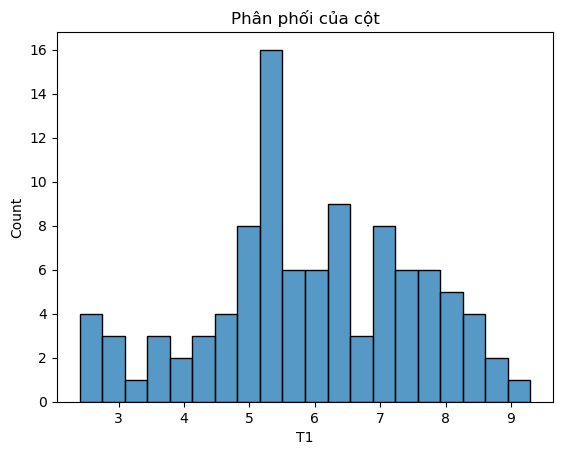

In [5]:
# Ví dụ: Vẽ histogram cho một cột
sns.histplot(df['T1'], bins=20)
plt.title('Phân phối của cột')
plt.show()

In [6]:
# Thống kê mô tả về các cột dữ liệu
print("\nThống kê mô tả:")
print(df.describe())


Thống kê mô tả:
               T1          T2          T3          T4          T5        T6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.0000   
mean     5.946000    6.374000    6.383000    6.291000    6.717000    6.9370   
std      1.608338    1.561443    1.574484    1.469563    1.478059    1.3632   
min      2.400000    2.800000    2.300000    2.900000    3.000000    3.7000   
25%      5.000000    5.300000    5.175000    5.300000    5.800000    6.0000   
50%      5.850000    6.250000    6.650000    6.350000    6.800000    7.1000   
75%      7.200000    7.525000    7.500000    7.600000    7.800000    8.0000   
max      9.300000    9.600000    9.500000    9.400000    9.500000    9.5000   

             DT     NGONNGU  TOANLOGICPHANTICH  GIAIQUYETVANDE  
count  3.000000  100.000000         100.000000      100.000000  
mean   2.666667    3.740000           4.255000        4.875000  
std    2.886751    1.424408           1.060053        1.041136  
min    1.00

               T1          T2          T3          T4          T5        T6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.0000   
mean     5.946000    6.374000    6.383000    6.291000    6.717000    6.9370   
std      1.608338    1.561443    1.574484    1.469563    1.478059    1.3632   
min      2.400000    2.800000    2.300000    2.900000    3.000000    3.7000   
25%      5.000000    5.300000    5.175000    5.300000    5.800000    6.0000   
50%      5.850000    6.250000    6.650000    6.350000    6.800000    7.1000   
75%      7.200000    7.525000    7.500000    7.600000    7.800000    8.0000   
max      9.300000    9.600000    9.500000    9.400000    9.500000    9.5000   

             DT     NGONNGU  TOANLOGICPHANTICH  GIAIQUYETVANDE  
count  3.000000  100.000000         100.000000      100.000000  
mean   2.666667    3.740000           4.255000        4.875000  
std    2.886751    1.424408           1.060053        1.041136  
min    1.000000    1.000000 

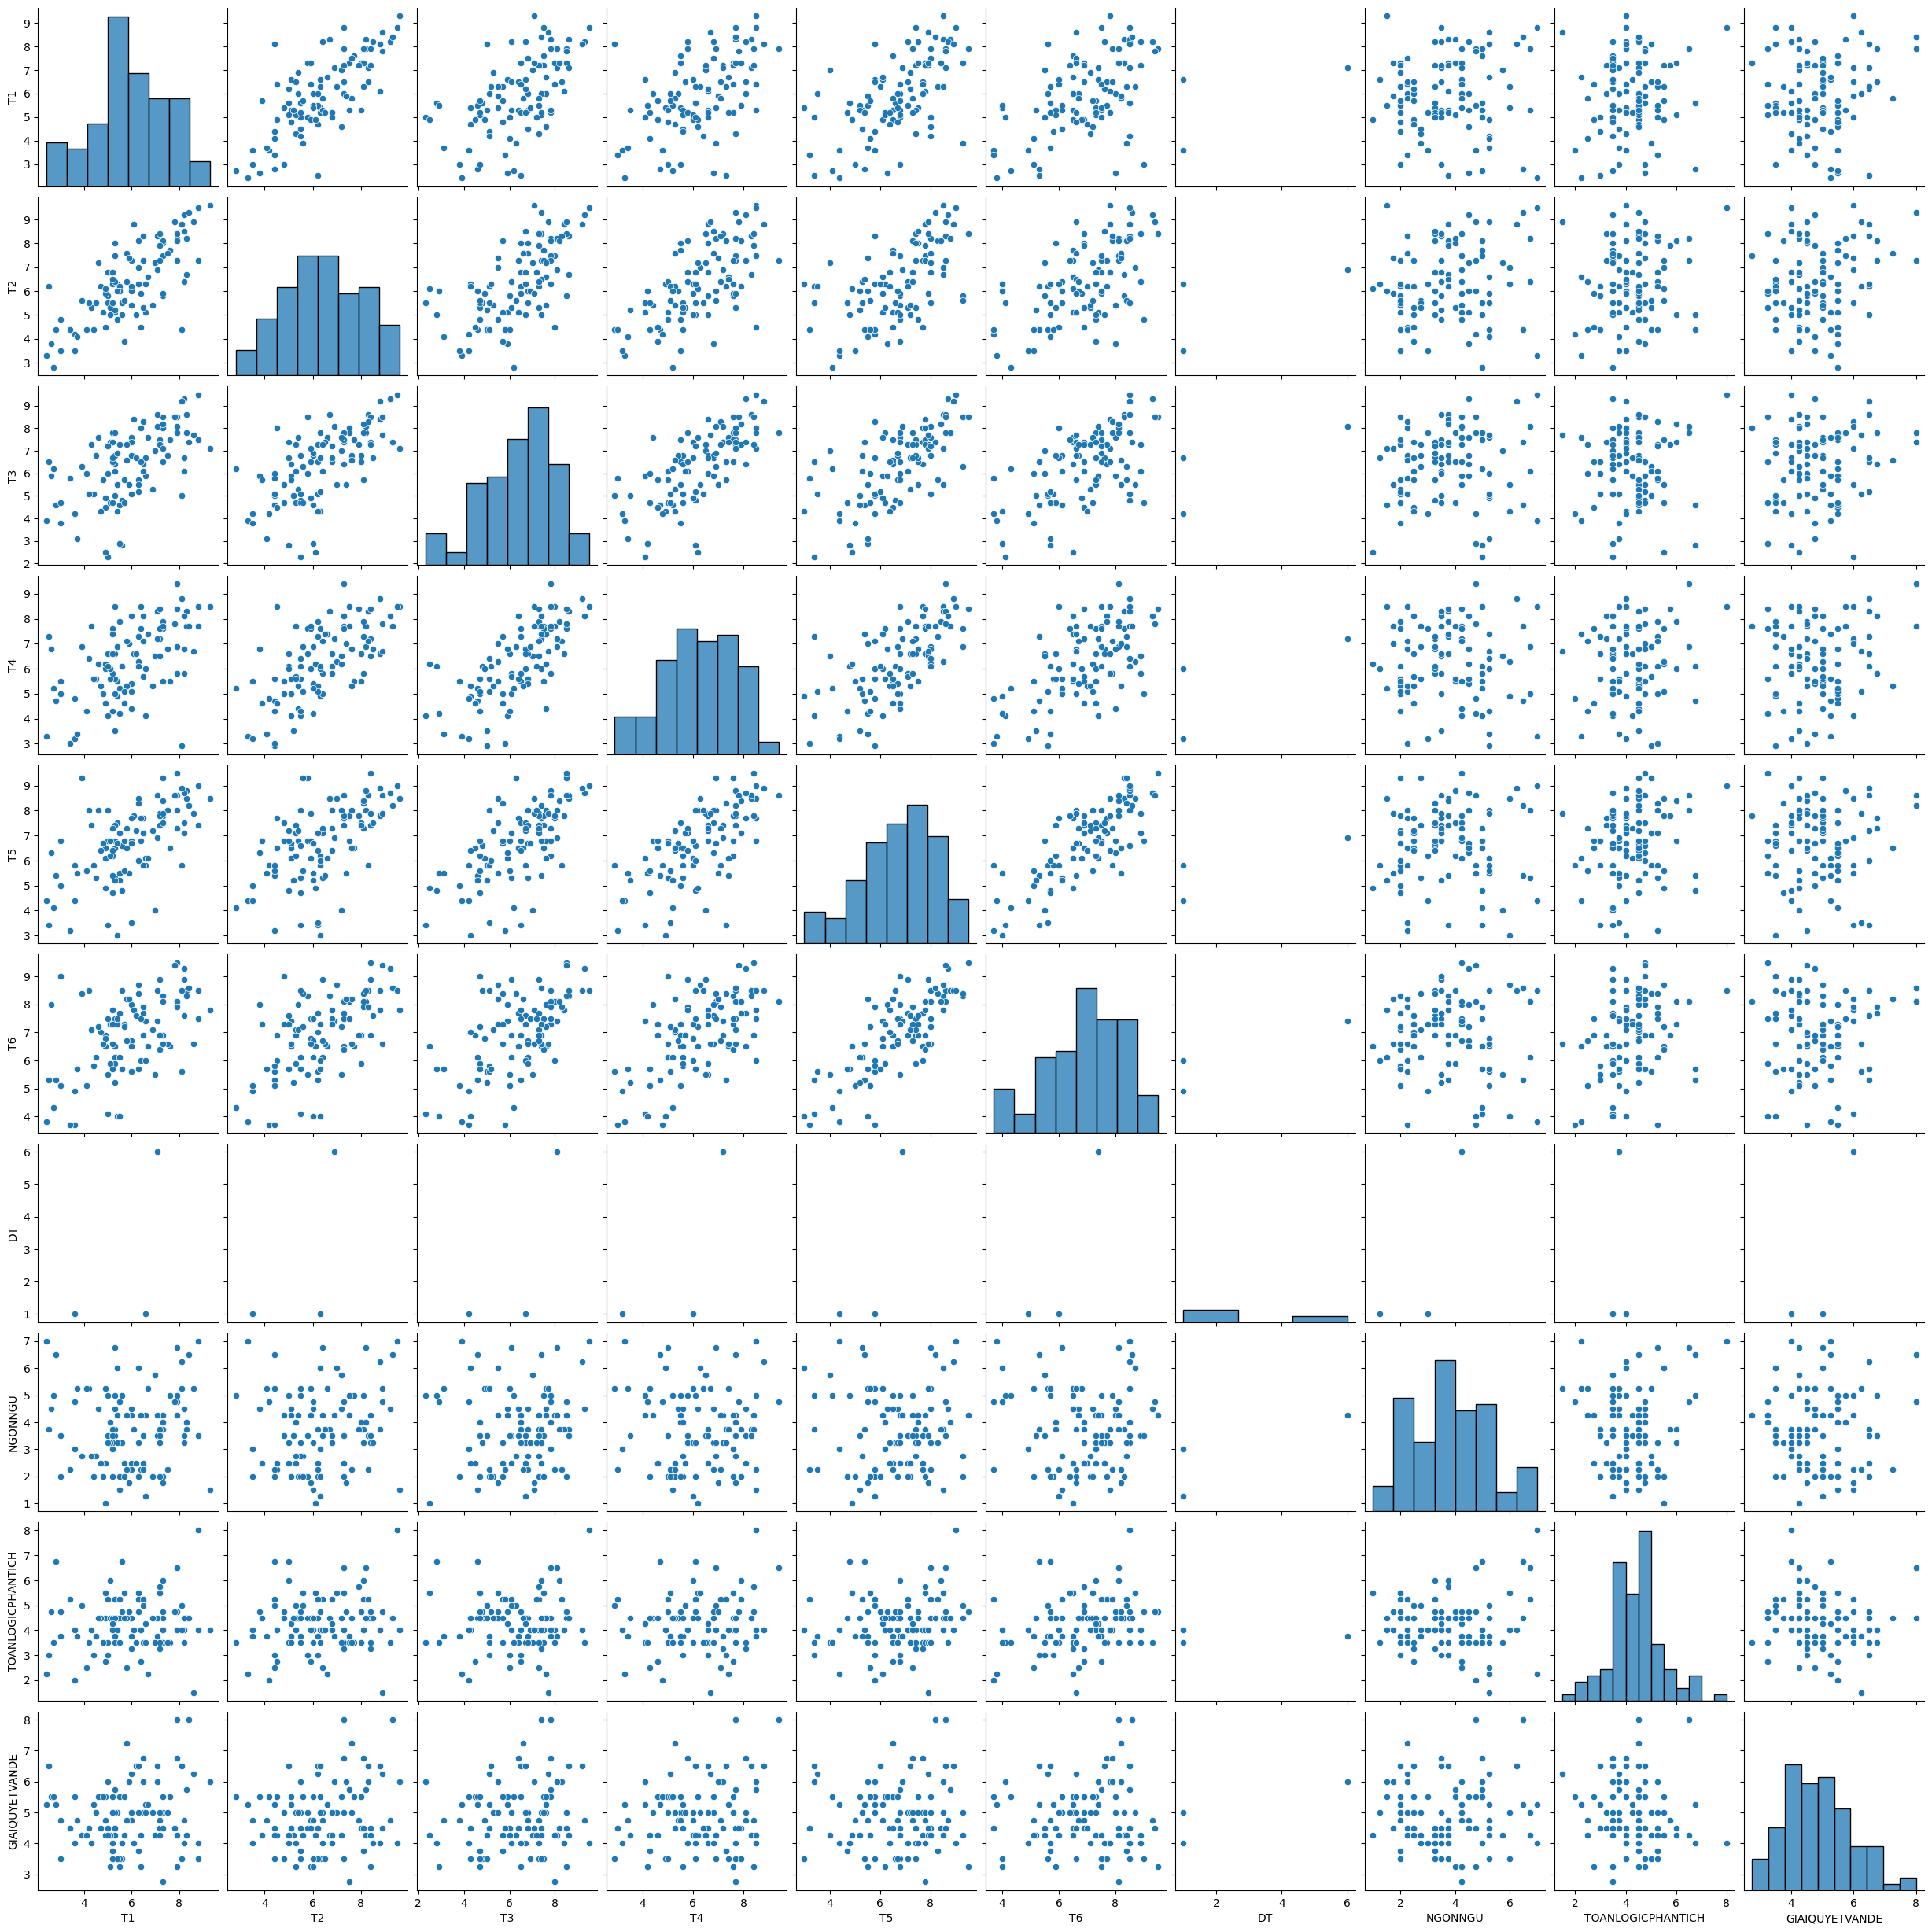

In [7]:
print(df.describe())
sns.pairplot(df)
plt.show()

In [8]:
df.columns

Index(['MSSV', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'DT', 'KV', 'NGONNGU',
       'TOANLOGICPHANTICH', 'GIAIQUYETVANDE', 'KT', 'NGAYTHI',
       'DINHHUONGNGHENGHIEP'],
      dtype='object')

In [9]:
df=df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT','TOANLOGICPHANTICH']]

In [10]:
df.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'TOANLOGICPHANTICH'], dtype='object')

In [11]:
df.rename(columns={'TOANLOGICPHANTICH': 'LOGIC'}, inplace=True)

In [12]:
df.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'LOGIC'], dtype='object')

In [13]:
# Select the input features (age and Istat) and the target variable (medv)
df[['GT']]

# one-hot encoding
# List of columns to one-hot encode[]
columns_to_encode = ['GT']

# Perform one-hot encoding
df = pd.get_dummies(df,columns=columns_to_encode)
df.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'LOGIC', 'GT_F', 'GT_M'], dtype='object')

In [14]:
df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'LOGIC', 'GT_F', 'GT_M']].astype(float)
df.columns
df.head(100)

,T1,T2,T3,T4,T5,T6,LOGIC,GT_F,GT_M
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,4.00,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,6.75,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,4.50,0,1
...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,1.50,1,0
96,3.7,4.1,3.1,3.4,5.5,5.7,3.75,1,0
97,8.8,9.5,9.5,8.5,9.0,8.5,8.00,0,1
98,2.7,2.8,6.2,5.2,4.1,4.3,3.50,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      100 non-null    float64
 1   T2      100 non-null    float64
 2   T3      100 non-null    float64
 3   T4      100 non-null    float64
 4   T5      100 non-null    float64
 5   T6      100 non-null    float64
 6   LOGIC   100 non-null    float64
 7   GT_F    100 non-null    uint8  
 8   GT_M    100 non-null    uint8  
dtypes: float64(7), uint8(2)
memory usage: 5.8 KB


In [16]:
x=df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M']]
y=df[['LOGIC']]

In [17]:
x

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,7.2,8.4,7.4,7.2,7.4,6.9,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,0,1
...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,1,0
96,3.7,4.1,3.1,3.4,5.5,5.7,1,0
97,8.8,9.5,9.5,8.5,9.0,8.5,0,1
98,2.7,2.8,6.2,5.2,4.1,4.3,0,1


In [18]:
y

,LOGIC
0,3.25
1,4.00
2,6.75
3,4.25
4,4.50
...,...
95,1.50
96,3.75
97,8.00
98,3.50


In [19]:
# Chia tách ra trainning (huấn luyện) và testing (kiểm thử)
# chia test size 0.2 là 20% còn 80% là train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=16)


In [20]:
import numpy as np

# Biến đổi theo hàm x*x trên tập train
x_train = x_train.apply(lambda x: np.square(x))

# In ra một số dòng dữ liệu đã được biến đổi
print("Dữ liệu sau khi transform:")
print(x_train.head(10))


Dữ liệu sau khi transform:
       T1     T2     T3     T4     T5     T6  GT_F  GT_M
96  13.69  16.81   9.61  11.56  30.25  32.49     1     0
5   86.49  92.16  50.41  72.25  72.25  60.84     0     1
90  65.61  77.44  84.64  77.44  79.21  72.25     0     1
53  24.01  37.21   6.25  38.44  24.01  42.25     0     1
67  21.16  51.84  57.76  38.44  64.00  51.84     0     1
81  32.49  15.21  32.49  21.16  46.24  53.29     0     1
39  18.49  28.09  53.29  59.29  54.76  50.41     0     1
11  62.41  67.24  65.61  47.61  64.00  65.61     0     1
10  27.04  39.69  60.84  57.76  38.44  53.29     1     0
86  39.69  39.69  27.04  37.21  36.00  32.49     0     1


In [21]:
x_train.info

<bound method DataFrame.info of        T1     T2     T3     T4     T5     T6  GT_F  GT_M
96  13.69  16.81   9.61  11.56  30.25  32.49     1     0
5   86.49  92.16  50.41  72.25  72.25  60.84     0     1
90  65.61  77.44  84.64  77.44  79.21  72.25     0     1
53  24.01  37.21   6.25  38.44  24.01  42.25     0     1
67  21.16  51.84  57.76  38.44  64.00  51.84     0     1
..    ...    ...    ...    ...    ...    ...   ...   ...
31   6.76  14.44  34.81  46.24  39.69  64.00     0     1
68  53.29  65.61  67.24  62.41  70.56  65.61     0     1
65   9.00  12.25  14.44  30.25  25.00  26.01     0     1
69  36.00  38.44  26.01  26.01  12.25  31.36     0     1
41  68.89  67.24  60.84  59.29  77.44  72.25     1     0

[80 rows x 8 columns]>

array([[<Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>],
       [<Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>],
       [<Axes: title={'center': 'T5'}>, <Axes: title={'center': 'T6'}>]],
      dtype=object)

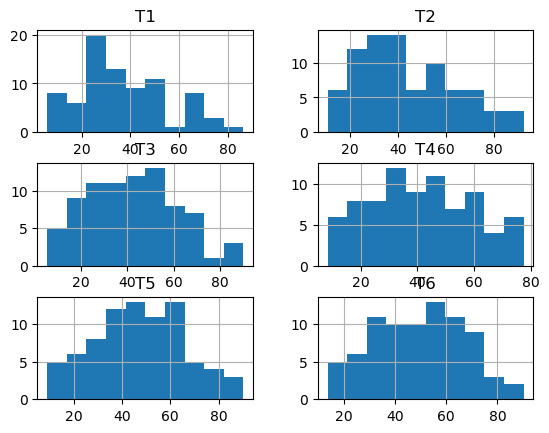

In [22]:
x_train.iloc[:,0:6].hist()

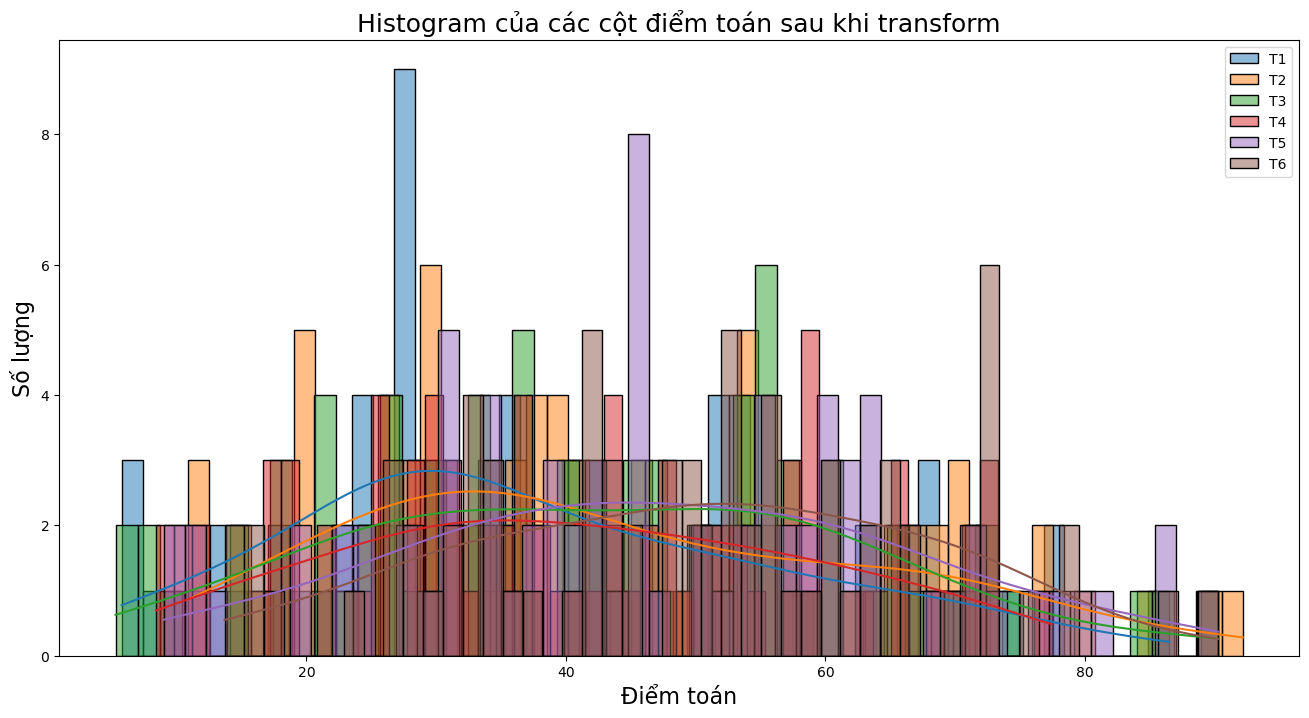

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cột điểm toán cần vẽ histogram
math_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

# Vẽ histogram cho từng cột điểm toán sau khi transform
plt.figure(figsize=(16, 8))
for column in math_columns:
    sns.histplot(x=x_train[column], bins=50, kde=True, label=column)

plt.xlabel('Điểm toán', fontsize=16)
plt.ylabel('Số lượng', fontsize=16)
plt.title("Histogram của các cột điểm toán sau khi transform", fontsize=18)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Histogram of Sepal.Width')

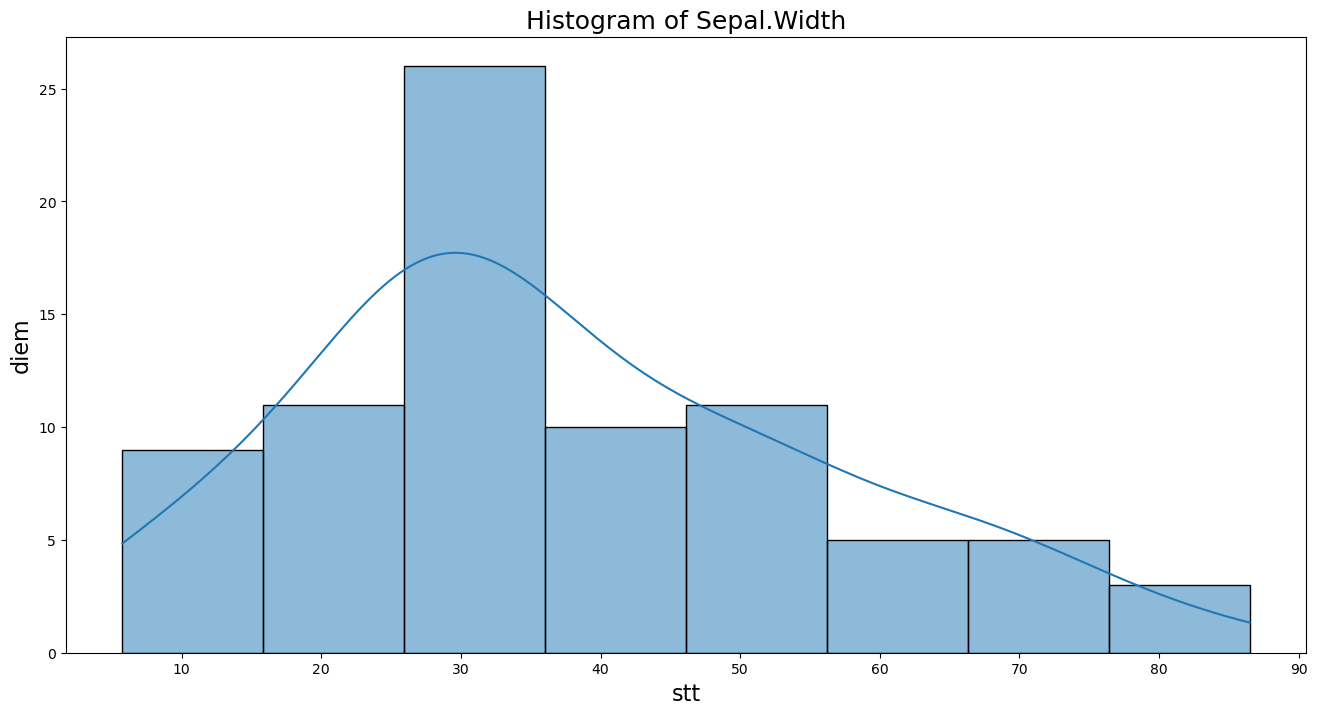

In [24]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T1', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

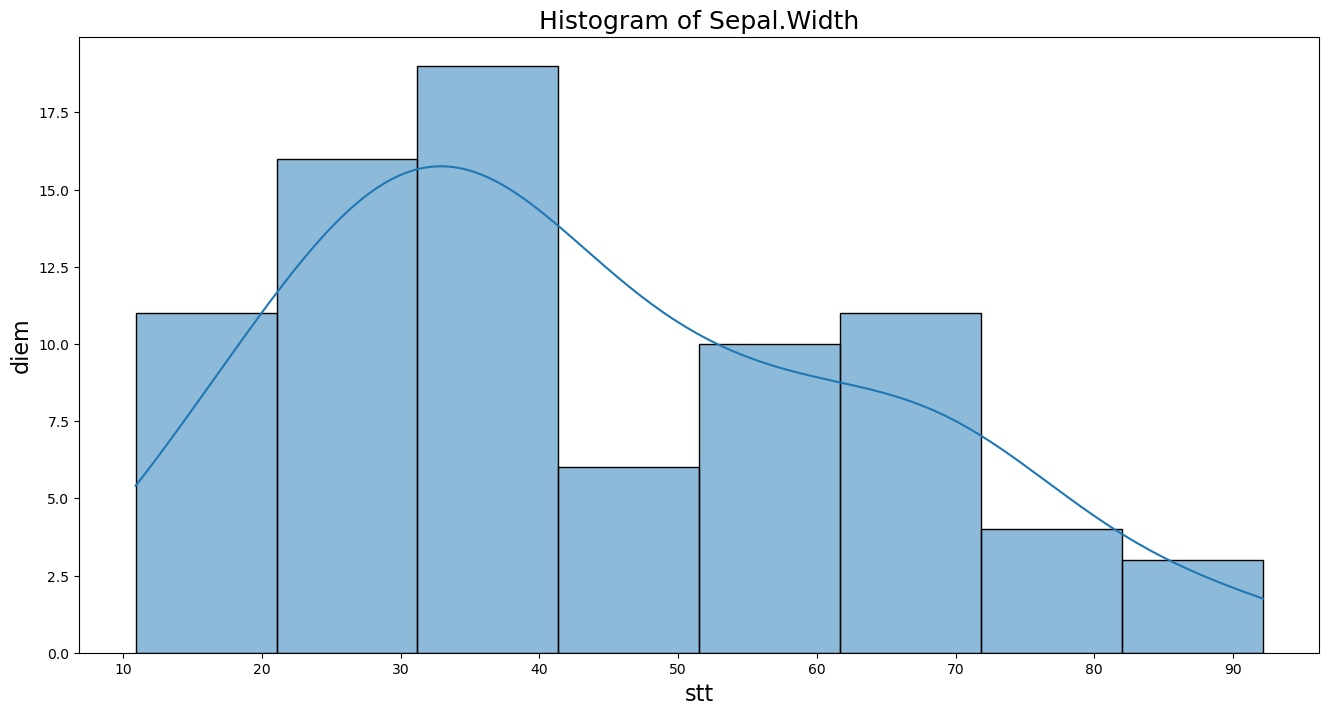

In [25]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T2', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

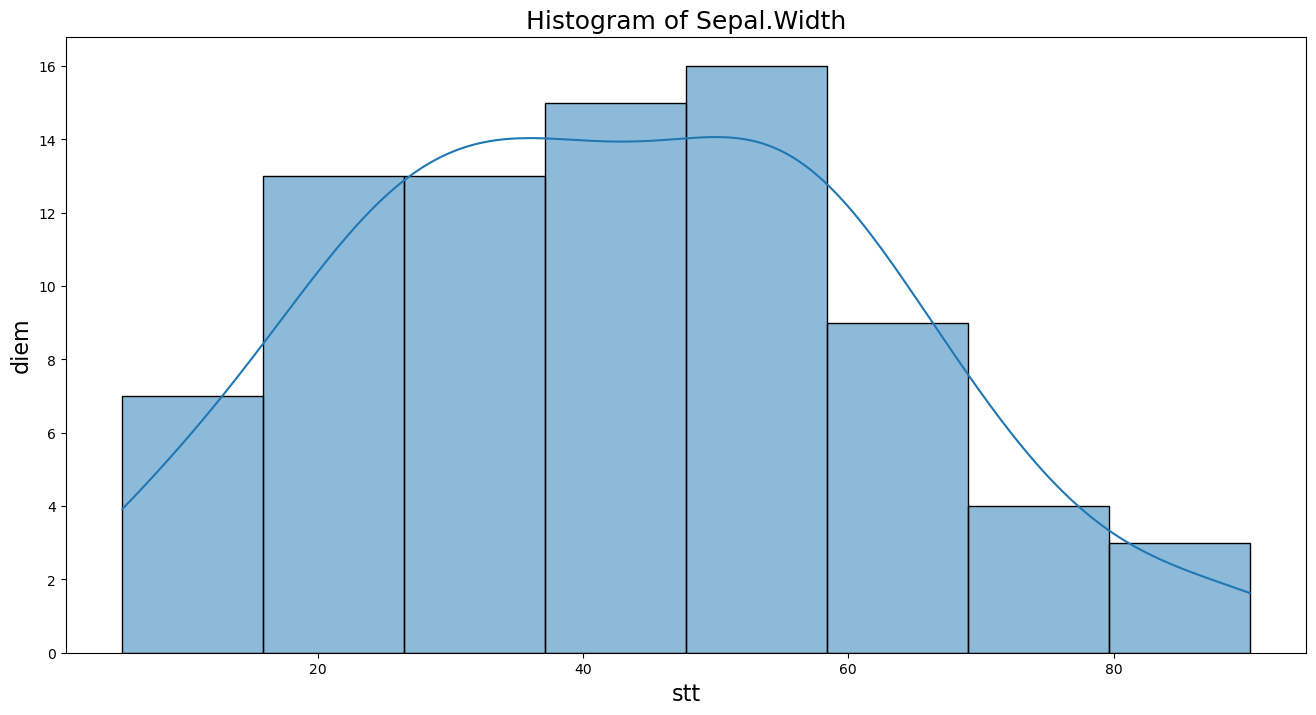

In [26]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T3', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

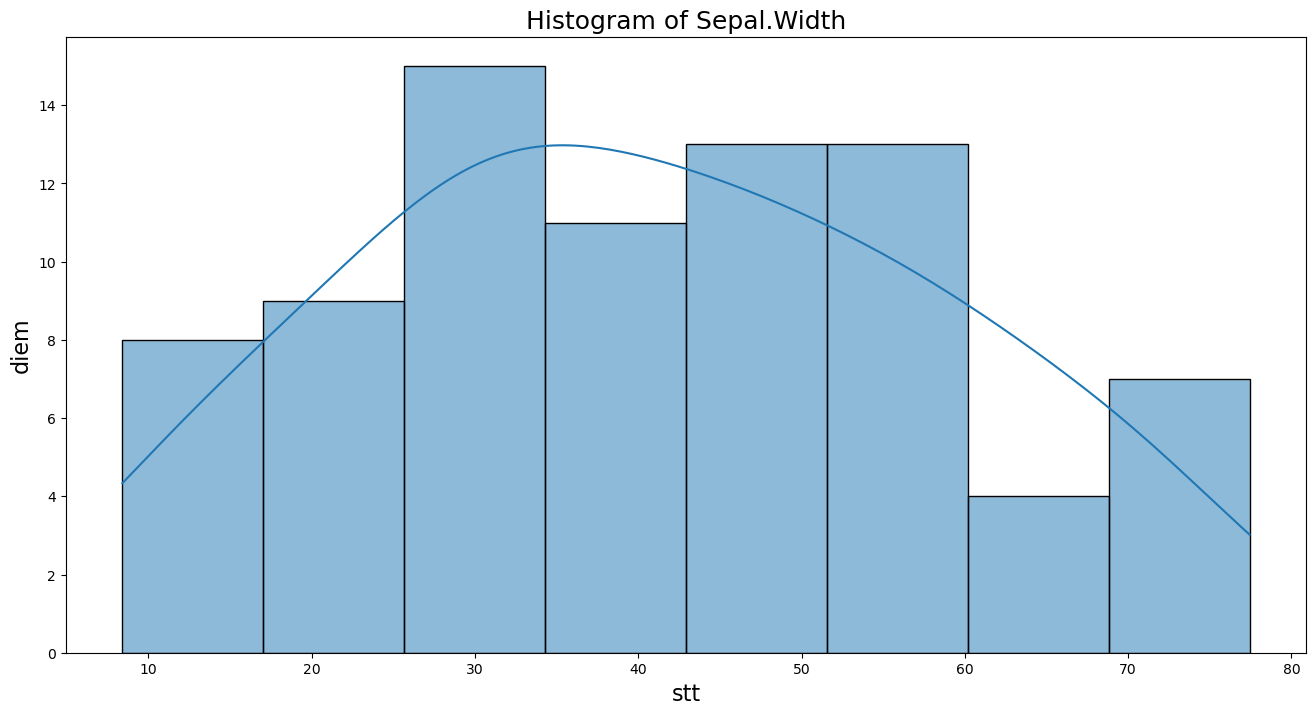

In [27]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T4', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

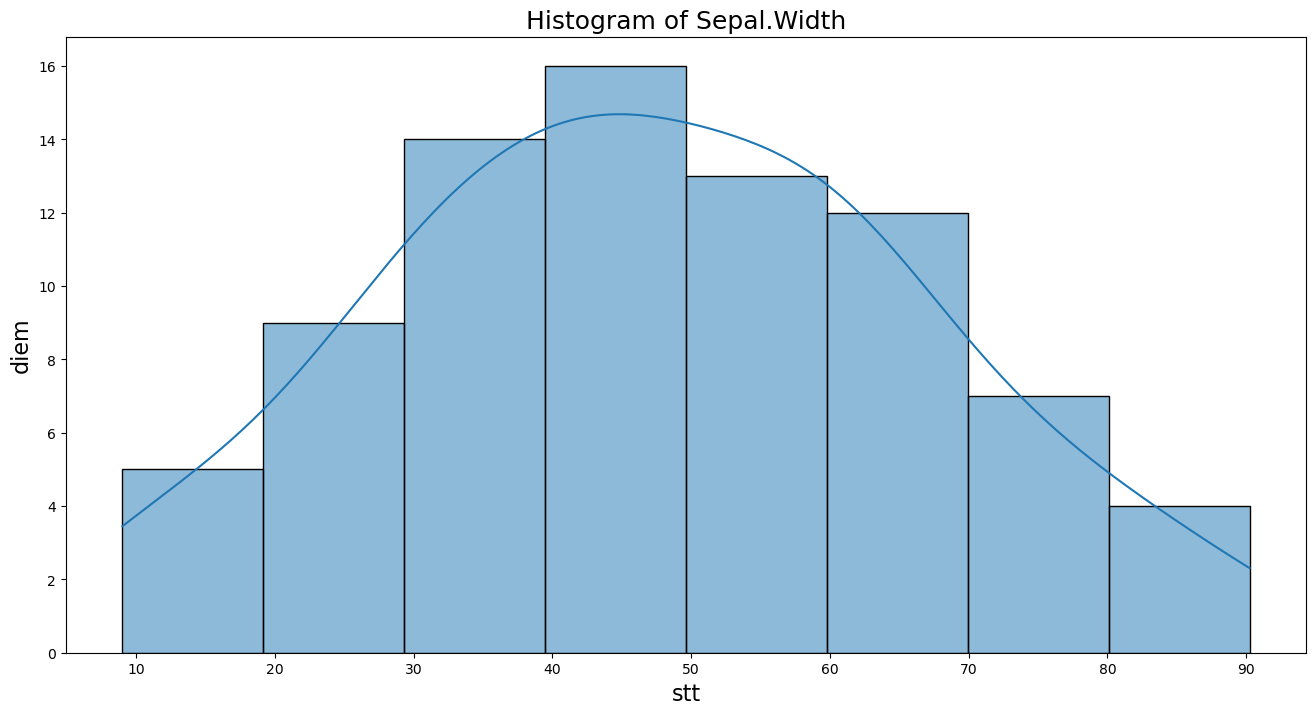

In [28]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T5', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

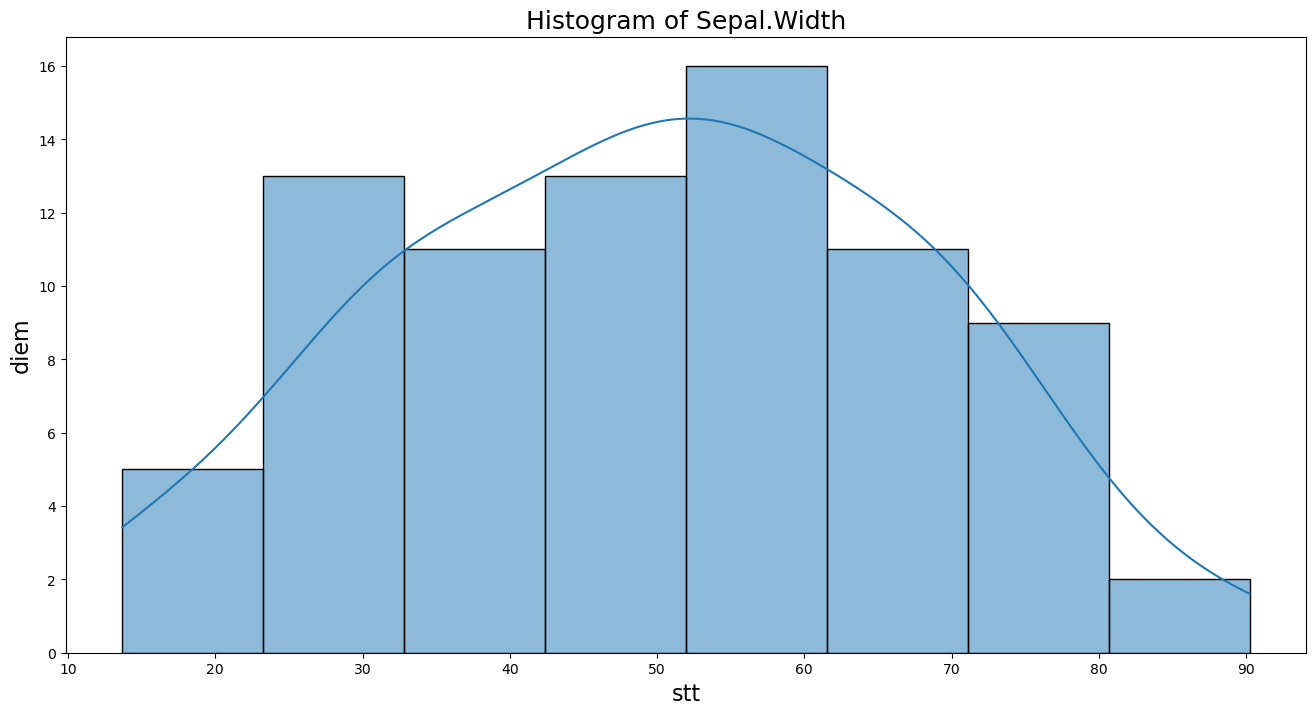

In [29]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='T6', data = x_train,kde=True)
plt.xlabel('stt', fontsize=16)
plt.ylabel('diem', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chọn các cột cần chuẩn hóa
columns_to_scale = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']  # Chỉ định các cột điểm cần chuẩn hóa

# Chuẩn hóa dữ liệu trên tập huấn luyện
# Tạo một bản sao của tập huấn luyện
x_train_scaled = x_train.copy()  

# Áp dụng MinMaxScaler cho các cột cần chuẩn hóa
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])  

# In thông tin sau khi chuẩn hóa
print(x_train_scaled.head())


          T1        T2        T3        T4        T5        T6  GT_F  GT_M
96  0.098229  0.072844  0.050847  0.045632  0.261538  0.245559     1     0
5   1.000000  1.000000  0.531073  0.924815  0.778462  0.615857     0     1
90  0.741360  0.818875  0.933969  1.000000  0.864123  0.764890     0     1
53  0.226062  0.323859  0.011299  0.435028  0.184738  0.373041     0     1
67  0.190759  0.503876  0.617585  0.435028  0.676923  0.498302     0     1


<Axes: >

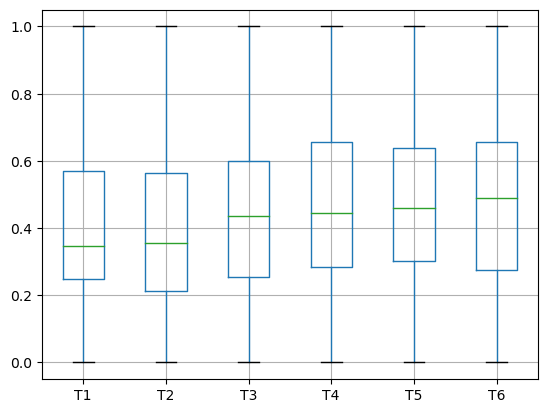

In [31]:
x_train_scaled.iloc[:,0:6].boxplot()
# 0:6 lấy cột từ cộ 0 tới 5

-----------

degree bằng bao nhiêu thì sai số thấp nhất?

---------------------